# Using the particle mesh emulator

The `pmesh_emulator` is made to be simple to use. In this notebook we will demonstrate how the emulator can predict the training data for one simulations (i.e. predict it's own training data).

In [1]:
import numpy as np
import pmesh_emulator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Formatting
plt.rc("text", usetex=True)
plt.rc("font", size=24, family="serif")

In [3]:
#Create the emulator
emu = pmesh_emulator.pmesh_emulator()

In [4]:
#Pull out the wavenumbers (k) and redshifts (z)
#TODO - make these functions
k = emu.k
z = emu.zs
print(k.shape, z.shape)

(1023,) (30,)


In [5]:
#Select one simulation (index 0) and pull out it's P(k,z)
simulation_index = 0
P = emu.pkz[simulation_index]
P = P.reshape((len(z), len(k)))
print(P.shape)

(30, 1023)


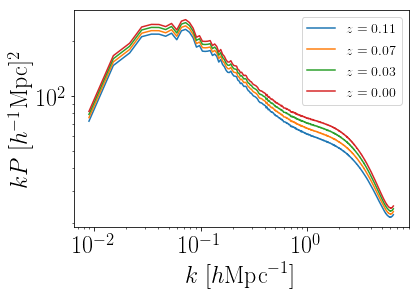

In [6]:
#Plot the first few power spectra
for i in range(len(z)-4, len(z)):
    plt.loglog(k, k**1*P[i], label=r"$z={0:.2f}$".format(z[i]))
plt.xlabel(r"$k\ [h{\rm Mpc}^{-1}]$")
plt.ylabel(r"$kP\ [h^{-1}{\rm Mpc}]^2$")
plt.legend(fontsize=14)
plt.savefig("sim.png", dpi=300, bbox_inches="tight")

In [7]:
#Get the training data for this sim
params = emu.params[simulation_index]

In [8]:
#Predict for this sim
P_predict = emu.predict(params).reshape((len(z),len(k)))
print(P_predict.shape)

(30, 1023)


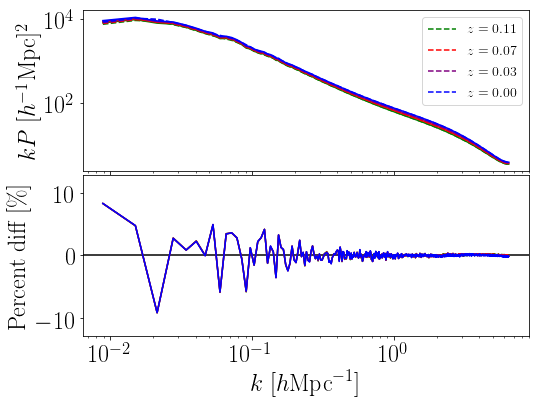

In [9]:
#Overplot the prediction and the data
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8,6))
plt.subplots_adjust(hspace=0.02)
colors = ["g", "r", "purple", "blue"]
for i in range(len(z)-4, len(z)):
    ax[0].loglog(k, k**0*P[i], color=colors[i-len(z)+4])
    ax[0].loglog(k, k**0*P_predict[i], ls="--",label=r"$z={0:.2f}$".format(z[i]), 
                 color=colors[i-len(z)+4])
    percent_diff = 100*(P[i] - P_predict[i])/P_predict[i]
    ax[1].plot(k, percent_diff, color=colors[i-len(z)+4])
ax[1].set_ylim(-13, 13)
ax[1].axhline(0, c='k', zorder=-1)
ax[1].set_xlabel(r"$k\ [h{\rm Mpc}^{-1}]$")
ax[0].set_ylabel(r"$kP\ [h^{-1}{\rm Mpc}]^2$")
ax[0].legend(fontsize=14)
ax[1].set_ylabel(r"Percent diff $[\%]$")
plt.savefig("emu_vs_training.png", dpi=300, bbox_inches="tight")

In [25]:
#Now let's try to plot against a sim that is not used to build the emulator
#Select one simulation (index 0) and pull out it's P(k,z)
simulation_index = 5
excluded_indices = np.arange(10)
print(excluded_indices)
emu = pmesh_emulator.pmesh_emulator(excluded_indices=excluded_indices)
params = emu.excluded_params[simulation_index]
P = emu.excluded_pkz[simulation_index]
P = P.reshape((len(z), len(k)))
print(P.shape)

[0 1 2 3 4 5 6 7 8 9]
(30, 1023)


In [26]:
P_predict = emu.predict(params).reshape((len(z),len(k)))

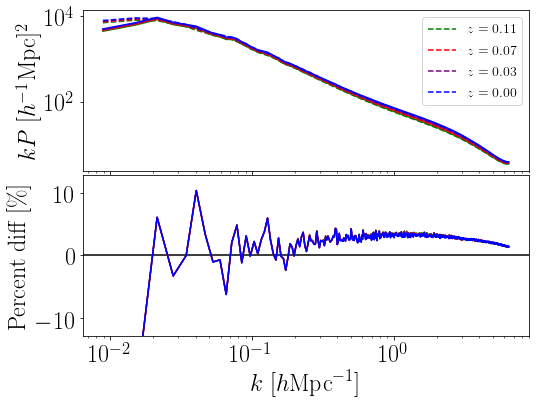

In [27]:
#Overplot the prediction and the data
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8,6))
plt.subplots_adjust(hspace=0.02)
colors = ["g", "r", "purple", "blue"]
for i in range(len(z)-4, len(z)):
    ax[0].loglog(k, k**0*P[i], color=colors[i-len(z)+4])
    ax[0].loglog(k, k**0*P_predict[i], ls="--",label=r"$z={0:.2f}$".format(z[i]), 
                 color=colors[i-len(z)+4])
    percent_diff = 100*(P[i] - P_predict[i])/P_predict[i]
    ax[1].plot(k, percent_diff, color=colors[i-len(z)+4])
ax[1].set_ylim(-13, 13)
ax[1].axhline(0, c='k', zorder=-1)
ax[1].set_xlabel(r"$k\ [h{\rm Mpc}^{-1}]$")
ax[0].set_ylabel(r"$kP\ [h^{-1}{\rm Mpc}]^2$")
ax[0].legend(fontsize=14)
ax[1].set_ylabel(r"Percent diff $[\%]$")
plt.savefig("emu_vs_excluded.png", dpi=300, bbox_inches="tight")